# El inpainting como interpolación de funciones
 M. Bertalmio, G. Sapiro, V. Caselles, and C. Ballester, “Image
inpainting,” in Comput. Graph. (SIGGRAPH 2000), July 2000, pp.
417–424.

**Idea**: Prolongar las líneas isofóticas que llegan a $\partial \Omega$ manteniendo el ángulo de llegada, y continuar dibujando $\partial \Omega$ de esta manera, curvando progresivamente las líneas prolongadas progreesivamente para evitar que se crucen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Prueba en 1-D

Consideraremos una señal discreta unidimensional $I_0(i)$ y un $\Omega$ a inpaintear de la forma $\Omega = [Q,P]$. La idea es utilizar un "enfoque evolutivo" en el que generamos una familia de señales $I(i,n)$ tal que $I(i,0) = I_0(i)$ y $\lim_{n\rightarrow\infty} I(i,n) = I_R(i)$ es la imagen con inpainting.

Para el caso 1-D, con $\Omega = [Q,P]$,  "prolongar las líneas en $\Omega$" se interpreta como "continuar la función $I_0(i)$ desde la izquierda de $Q$ a su derecha, y desde la derecha de $P$ hacia su izquierda, de forma suave".


**Pseudocódigo**:

$\text{\tt para } n=0..n\_iteraciones:$

$\quad \text{\tt para cada pixel }i\in \Omega:$

$\qquad\text{\tt computar } I^{n}_{xx}(i)$

$\qquad\text{\tt computar } I^{n}_{xx}(i-1)$

$\qquad\text{\tt computar } I^{n}_{t}(i):= I^{n}_{xx}(i) - I^{n}_{xx}(i-1)$

$\qquad I^{n+1}(i)= I^{n}(i) + \Delta t\cdot I^{n}_{t}(i)$

Donde $I^{n}_{xx}(i) = I^{n}(i-1)-2I^{n}(i) + I^{n}(i+1)$ y $\Delta t$ controla la veolicdad de evolución.

Cambiamos en el tiempo la funcion $I(i,n)$ de forma que para cada punto $i$, $I^{n+1}(i)$ tiende a seguir $I^{n(i-1)}$.

In [2]:
def inpainting1D(I0, Omega, N, dt):
    #Omega es un array de índices
    def L(I_n, Omega):
        return I_n[Omega-1] - 2*I_n[Omega] + I_n[Omega+1]
        
    I = np.zeros((len(I0),N))
    I[:,0] = I0
    for n in range(N-1):
        I_t = L(I[:,n], Omega) - L(I[:,n], Omega-1)
        I[:,n+1] = I[:,n]
        I[:,n+1][Omega] += dt * I_t
    return I[:,-1]


70.0


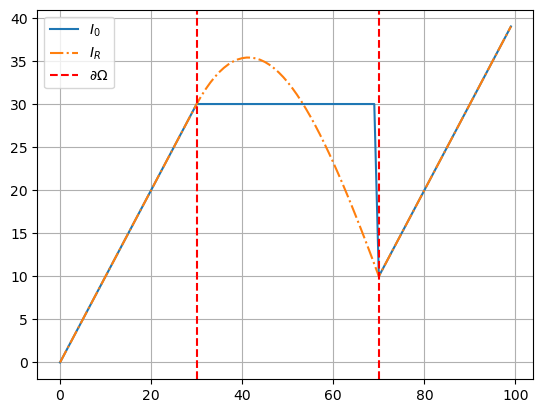

In [3]:
### Omega = [30,70]
Omega = np.arange(31,70)
### Definimos la función a inpaintiar

I0 = np.arange(100,dtype = float)
print(I0[70])
I0[70:] = I0[70:]-60
I0[Omega] = (lambda x: 0 *( x-30) + 30)(I0[Omega])


### inpaintiamos
I_R = inpainting1D(I0,Omega,10000,0.1)
### graficamos
plt.plot(I0, label=r"$I_0$")
plt.plot(I_R, label=r"$I_R$", linestyle="-.")


plt.axvline(x=30, color='r', linestyle='--', label=r"$\partial\Omega$")
plt.axvline(x=70, color='r', linestyle='--')
plt.grid()
plt.legend()

70.0


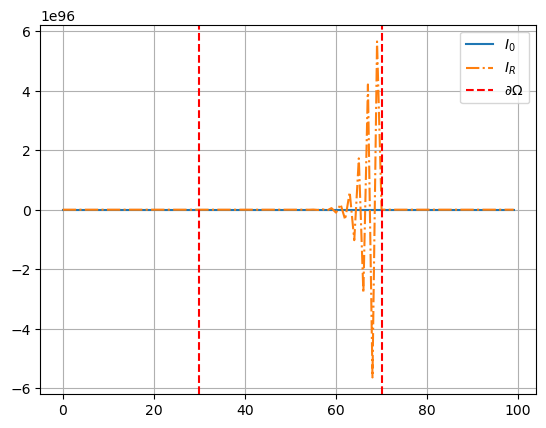

In [4]:
### Omega = [30,70]
Omega = np.arange(31,70)
### Definimos la función a inpaintiar

I0 = np.arange(100,dtype = float)
print(I0[70])
I0[70:] = I0[70:]-60
I0[Omega] = (lambda x: 0 *( x-30) + 30)(I0[Omega])


### inpaintiamos
I_R = inpainting1D(I0,Omega,10000,0.3)
### graficamos
plt.plot(I0, label=r"$I_0$")
plt.plot(I_R, label=r"$I_R$", linestyle="-.")


plt.axvline(x=30, color='r', linestyle='--', label=r"$\partial\Omega$")
plt.axvline(x=70, color='r', linestyle='--')
plt.grid()
plt.legend()